In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import pickle

maxsize = 10000
out_dir = "../dataset"
save_file = out_dir + "/dataset.pickle" # 保存先


result = []
fs = glob.glob(out_dir+"/*")
for i,labeldir in enumerate(fs):
    print("i=",i)
    print("labeldir=",labeldir)
    fs0 = glob.glob(labeldir+"/*")
    for j,f in enumerate(fs0):
        if j>=maxsize:break
        result.append([i,cv2.imread(f)])

pickle.dump(result, open(save_file, "wb"))
print("done!")

i= 0
labeldir= ../dataset\1_book
i= 1
labeldir= ../dataset\2_pen
i= 2
labeldir= ../dataset\3_scissors
i= 3
labeldir= ../dataset\4_amulet
i= 4
labeldir= ../dataset\5_earphone
i= 5
labeldir= ../dataset\6_mask
i= 6
labeldir= ../dataset\7_mahjongtile
i= 7
labeldir= ../dataset\dataset.pickle
done!


In [3]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import pickle
import numpy as np
from sklearn.model_selection import train_test_split

num_classes = 7
im_rows = 80
im_cols = 60
im_color = 3
in_shape = (im_rows, im_cols, im_color)

In [4]:
data_file =  "../dataset/dataset.pickle"
data = pickle.load(open(data_file,"rb"))

In [5]:
X = []
y = []
for d in data:
    (label,img)=d

    y.append(label)
    X.append(img)

X = np.array(X)
y = np.array(y)

In [6]:
# train dataとtest dataに分類
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,shuffle=True)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#One-Hot形式前のy_testを保存
y_test_org = y_test

# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


In [7]:
from keras.layers import RandomRotation, RandomZoom

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                    input_shape=in_shape))

    #水増し処理を追加
    # model.add(RandomTranslation(0.1, 0.1))
    model.add(RandomRotation(0.2))
    model.add(RandomZoom(0.3))

    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.summary()

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])

    return model

In [8]:
model = build_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 60, 32)        896       
                                                                 
 random_rotation (RandomRota  (None, 80, 60, 32)       0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 80, 60, 32)        0         
                                                                 
 activation (Activation)     (None, 80, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 58, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 78, 58, 32)        0         
                                                        

In [9]:
hist = model.fit(X_train, y_train,
    batch_size=128, epochs=30,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/25


C:\Users\yasus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/random_rotation/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/random_rotation/loop_body/GatherV2/pfor/Reshape:0", shape=(None, 80, 60, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/random_rotation/loop_body/GatherV2/pfor/Cast:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


16/16 [==============================] - 15s 750ms/step - loss: 2.0337 - accuracy: 0.1746 - val_loss: 1.8920 - val_accuracy: 0.2619
Epoch 2/25
16/16 [==============================] - 12s 752ms/step - loss: 1.7600 - accuracy: 0.3194 - val_loss: 1.4612 - val_accuracy: 0.5317
Epoch 3/25
16/16 [==============================] - 11s 719ms/step - loss: 1.5219 - accuracy: 0.4107 - val_loss: 1.3825 - val_accuracy: 0.4683
Epoch 4/25
16/16 [==============================] - 12s 723ms/step - loss: 1.2853 - accuracy: 0.5198 - val_loss: 0.8710 - val_accuracy: 0.6825
Epoch 5/25
16/16 [==============================] - 11s 719ms/step - loss: 1.0295 - accuracy: 0.6131 - val_loss: 0.7810 - val_accuracy: 0.7381
Epoch 6/25
16/16 [==============================] - 11s 713ms/step - loss: 0.9730 - accuracy: 0.6389 - val_loss: 0.8149 - val_accuracy: 0.6984
Epoch 7/25
16/16 [==============================] - 12s 719ms/step - loss: 0.8665 - accuracy: 0.6726 - val_loss: 0.7995 - val_accuracy: 0.6429
Epoch 8/25

In [10]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def model_evaluation(model):
    score = model.evaluate(X_test, y_test, verbose=1)
    print('正解率=', score[1], 'loss=', score[0])

    pred = model.predict(X_test) # modelは学習させたもの
    correct_count = [0] * num_classes
    count = [0] * num_classes

    for i in range(pred.shape[0]):
        prediction = np.argmax(pred[i]) # モデルの予測ラベル取得
        answer = y_test_org[i]
        count[answer] += 1
        if prediction == answer:
            correct_count[answer] += 1 # 正解数カウント

    accuracy = [correct/N for correct, N in zip(correct_count, count)] # 精度算出

    for label, acc in enumerate(accuracy):
        print('accuracy for label {} : {}'.format(label, acc))
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

4/4 [==============================] - 0s 48ms/step - loss: 0.6395 - accuracy: 0.8571
正解率= 0.8571428656578064 loss= 0.6395410895347595
4/4 [==============================] - 0s 47ms/step
accuracy for label 0 : 1.0
accuracy for label 1 : 0.48
accuracy for label 2 : 0.9411764705882353
accuracy for label 3 : 1.0
accuracy for label 4 : 0.8571428571428571
accuracy for label 5 : 0.9
accuracy for label 6 : 1.0


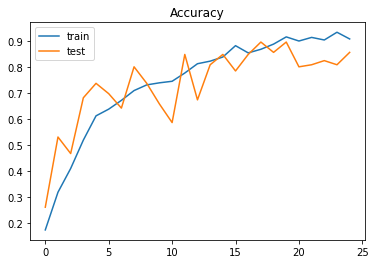

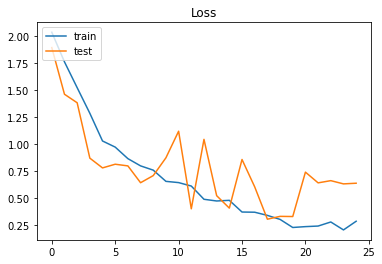

In [12]:
model_evaluation(model)

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_absolute_error
import seaborn as sns

In [14]:
kf = KFold(n_splits=3, shuffle=True)

all_loss=[]
all_val_loss=[]
all_acc=[]
all_val_acc=[]
ep=20

for train_index, val_index in kf.split(X_train,y_train):

    train_data=X_train[train_index]
    train_label=y_train[train_index]
    val_data=X_train[val_index]
    val_label=y_train[val_index]

    model=build_model()
    history=model.fit(train_data,
                      train_label,
                      epochs=ep,
                      batch_size=128,
                      verbose = 1,
                      validation_data=(val_data,val_label))

    loss=history.history['loss']
    val_loss=history.history['val_loss']
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']

    all_loss.append(loss)
    all_val_loss.append(val_loss)
    all_acc.append(acc)
    all_val_acc.append(val_acc)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


ave_all_loss=[
    np.mean([x[i] for x in all_loss]) for i in range(ep)]
ave_all_val_loss=[
    np.mean([x[i] for x in all_val_loss]) for i in range(ep)]
ave_all_acc=[
    np.mean([x[i] for x in all_acc]) for i in range(ep)]
ave_all_val_acc=[
    np.mean([x[i] for x in all_val_acc]) for i in range(ep)]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 80, 60, 32)        896       
                                                                 
 random_rotation_1 (RandomRo  (None, 80, 60, 32)       0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 80, 60, 32)        0         
                                                                 
 activation_6 (Activation)   (None, 80, 60, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 78, 58, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 78, 58, 32)        0         
                                                      

C:\Users\yasus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/random_rotation_1/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/random_rotation_1/loop_body/GatherV2/pfor/Reshape:0", shape=(None, 80, 60, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/random_rotation_1/loop_body/GatherV2/pfor/Cast:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


3/3 [==============================] - 22s 5s/step - loss: 1.9790 - accuracy: 0.1369 - val_loss: 1.9044 - val_accuracy: 0.3155
Epoch 2/20
3/3 [==============================] - 18s 5s/step - loss: 1.8866 - accuracy: 0.2560 - val_loss: 1.8449 - val_accuracy: 0.4583
Epoch 3/20
3/3 [==============================] - 18s 5s/step - loss: 1.7831 - accuracy: 0.3571 - val_loss: 1.5703 - val_accuracy: 0.5595
Epoch 4/20
3/3 [==============================] - 18s 5s/step - loss: 1.5201 - accuracy: 0.4554 - val_loss: 1.2937 - val_accuracy: 0.5595
Epoch 5/20
3/3 [==============================] - 19s 6s/step - loss: 1.4506 - accuracy: 0.4762 - val_loss: 1.2255 - val_accuracy: 0.5774
Epoch 6/20
3/3 [==============================] - 18s 5s/step - loss: 1.2455 - accuracy: 0.4940 - val_loss: 1.2244 - val_accuracy: 0.6131
Epoch 7/20
3/3 [==============================] - 18s 5s/step - loss: 1.2422 - accuracy: 0.5000 - val_loss: 1.1003 - val_accuracy: 0.5893
Epoch 8/20
3/3 [=============================

In [ ]:
preds = []
pred = model.predict(X_test)
y_pred = np.mean(pred, axis=0)
print(y_pred)
print(f'Test Score MAE: {mean_absolute_error(pred, y_test)}')

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
pred = np.argmax(model.predict(X_test), axis=1)
plt.figure(figsize=(30,15))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,  annot=True, fmt='d')
plt.show()